# Analysis on Indian Premier League

# By: Mayank Lohani

## Dataset : https://www.kaggle.com/nowke9/ipldata
![image.png](images/IPL.PNG)
**Introduction:** Indian Premier League (better known as IPL) is a short format (T-20) Mens Cricket tournament that is hosted in India. It is currently presided over by the Board of Cricket Control of India (BCCI). The Tournament comprises of 8 teams who complete with each other in a league format, which is followed by a knockout Stage. Some of the Teams who Played previously are no more in action
(For e.g. Deccan Chargers, Kochi Tuskers, Gujrat Lions, Pune Warriors etc). Two teams have been banned for two seasons, but have been a part of the tournament for the rest. 

### DATA READING

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

deliveries=pd.read_csv('data/deliveries.csv',encoding='latin1')
print(f'Number of rows    = {len(deliveries)}')
print(f'Number of columns = {len(deliveries.columns)}')
deliveries.head()

Number of rows    = 179078
Number of columns = 21


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
matches=pd.read_csv('data/matches.csv',encoding='latin1')
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')
matches.head()

Number of rows    = 756
Number of columns = 18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Cleaning the inconsistencies

Keeping team names and venue names same and abbreviating them for readability

In [25]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']



matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

matches.replace(x,y,inplace = True)
deliveries.replace(x,y,inplace = True)

In [26]:
# umpire3 contains all null values we can omit the column

matches.drop(['umpire3'], axis = 1, inplace = True)

## Let's dive into Anlaysis

<center><font size=5><b>Total No. of matches till 2020</b></font></center>

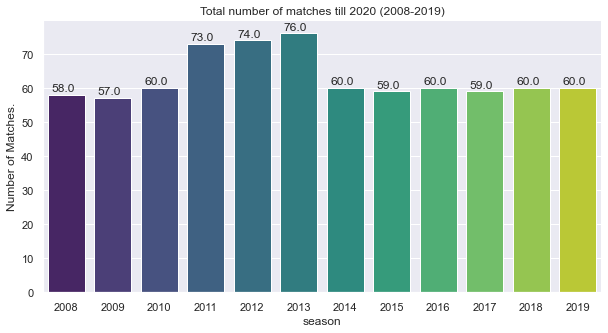

In [27]:
def annotation_plot(ax,w,h):                                    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
total_matches = matches.groupby('season')['id'].count()
plt.figure(figsize=(10,5))
ax = sns.countplot("season", data = matches, palette='viridis')
plt.title('Total number of matches till 2020 (2008-2019)')
plt.ylabel('Number of Matches.')
annotation_plot(ax,0.08,1)
plt.show()        

<center><font size=5><b>Total No. of wins by each team till 2020</b></font></center>

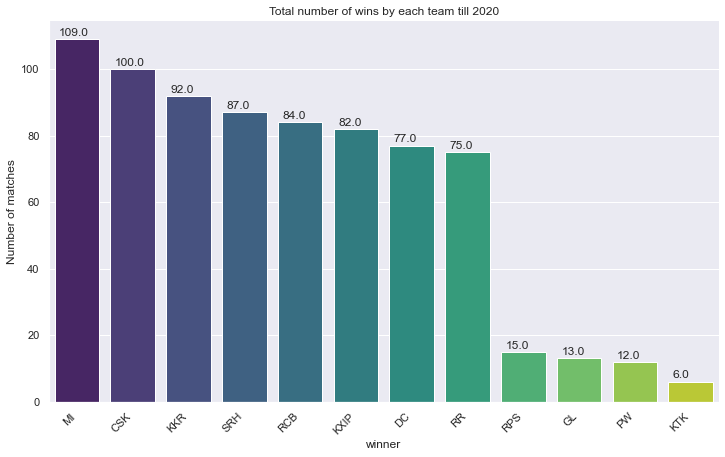

In [28]:
plt.figure(figsize=(12,7))
ax = sns.countplot("winner", data = matches, order = matches['winner'].value_counts().index,palette='viridis')
plt.title("Total number of wins by each team till 2020")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of matches')
annotation_plot(ax,0.08,1)
plt.show()

<center><font size=5><b>Year by Year Analysis till 2020</b></font></center>

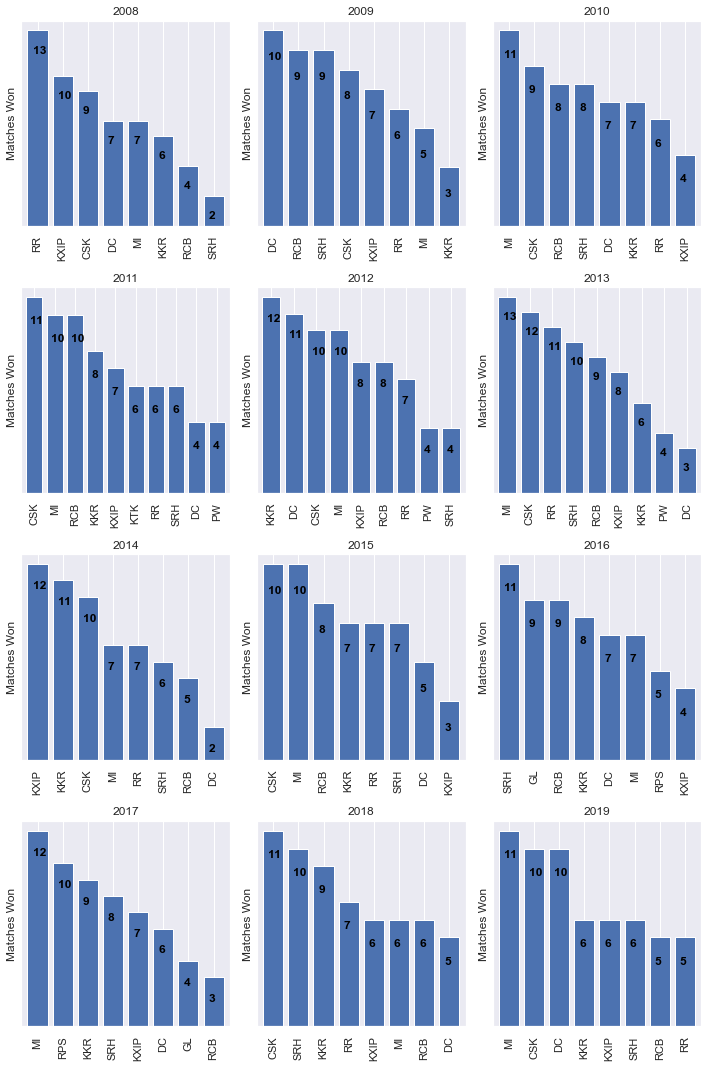

In [29]:
max_times_winner = matches.groupby('season')['winner'].value_counts()
groups = max_times_winner.groupby('season')
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (10,15), width = 0.8)
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

<center><font size=5><b>Top Cities that have hosted IPL matches</b></font></center>

Top 10 Cities with the maximum number of Matches Played:
           city  Match Counts
23      Mumbai           101
21     Kolkata            77
10       Delhi            74
2    Bangalore            66
14   Hyderabad            64
8      Chennai            57
16      Jaipur            47
7   Chandigarh            46
26        Pune            38
12      Durban            15


Text(0.5, 1.0, 'Top Cities that have hosted IPL Matches')

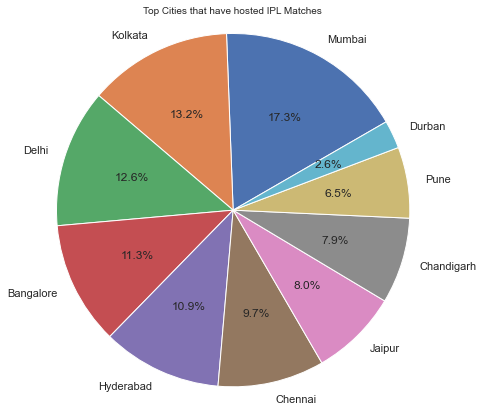

In [30]:
city_counts= matches.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]
print('Top 10 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(7,7))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=10)

<center><font size=5><b>Analysis of Captain's Decision after winning toss till 2020</b></font></center>

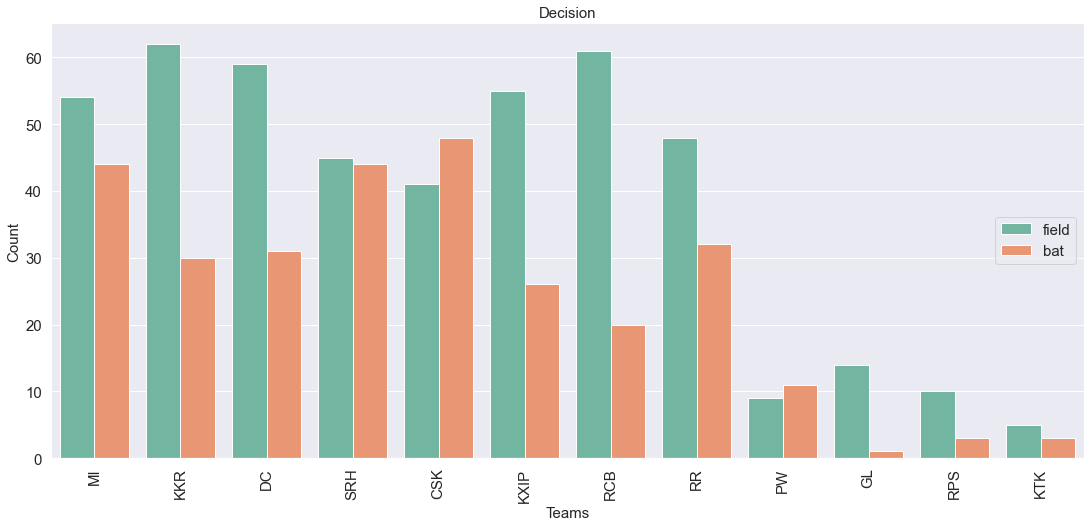

In [31]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(matches['toss_winner'],order=matches['toss_winner'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Decision',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

<center><font size=5><b>Top 10 Batsmen in the Tournament till 2020</b></font></center>

In [32]:
batting_tot=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in the Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in the Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


<center><font size=4><b>Kohli is our Star Batsman</b></font></center>

![image.png](images/kohli.PNG)

<center><font size=5><b>Top 10 Bowler in the Tournament till 2020</b></font></center>

In [33]:
bowling_wickets=deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top 10 Bowler in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',hover_data=['bowler'], color='Wickets',title='Top 10 Bowler in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Bowler in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


<center><font size=4><b>Malinga is our Star Bowler</b></font></center>

![image.png](images/Lasith-Malinga.PNG)

<center><font size=5><b>The Head-to-Head Performace Matrix of Teams in IPL till 2020</b></font></center>

Text(84.5, 0.5, 'Match')

<Figure size 432x288 with 0 Axes>

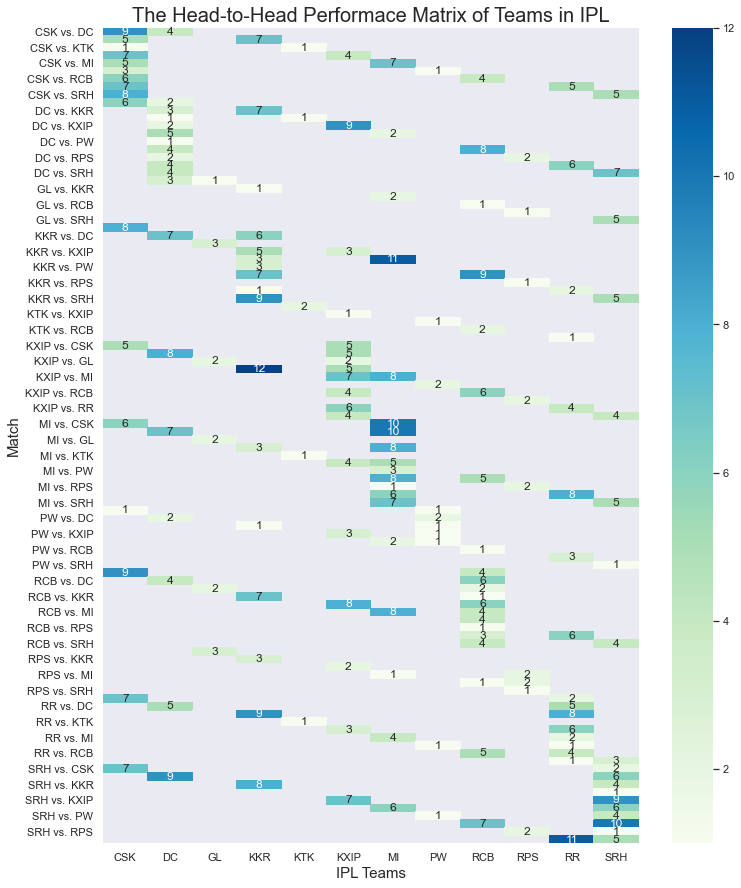

In [58]:
Current_teams=['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']
team_1_filter=matches[matches.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', 
                     index=['Game'], 
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="GnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

<center><font size=5><b>Biggest win by runs each season</b></font></center>

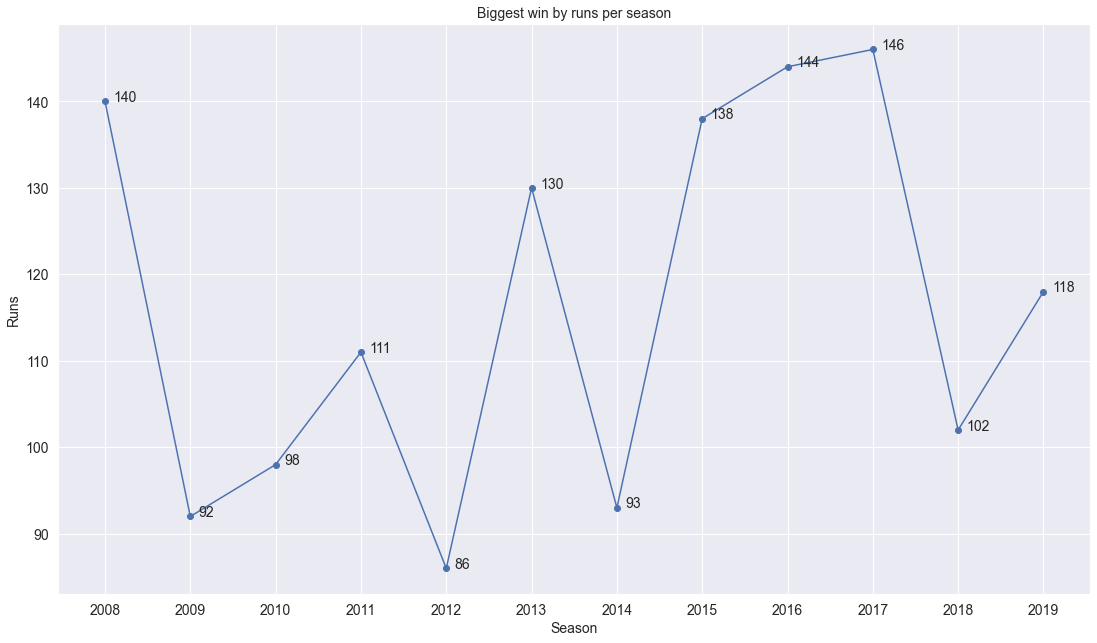

In [35]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(matches[matches['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

<center><font size=5><b>Season wise match summary of matches won by runs</b></font></center>

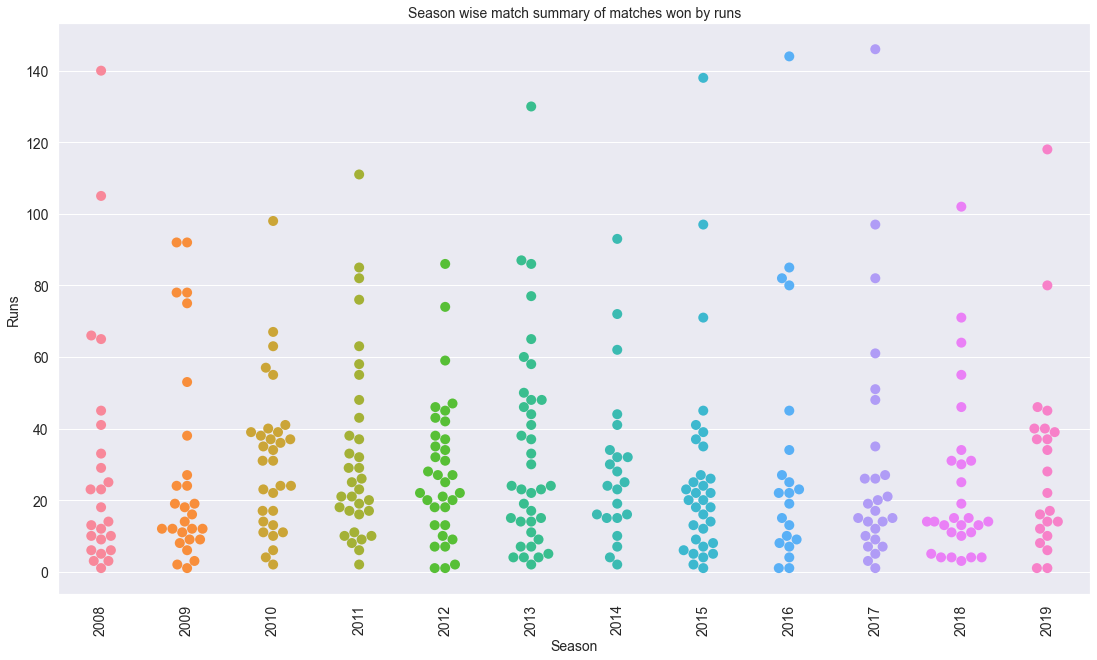

In [37]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(matches['season'],matches[matches['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

<center><font size=5><b>All Set for MI vs CSK Analysis</b></font></center>

In [59]:
mi_csk=matches[np.logical_or(
    np.logical_and(matches['team1']=='MI',matches['team2']=='CSK'),
    np.logical_and(matches['team1']=='CSK',matches['team2']=='MI'))]

<center><font size=5><b>MI vs CSK head to head</b></font></center>

![image.png](images/IPL-MI-vs-CSK.png)

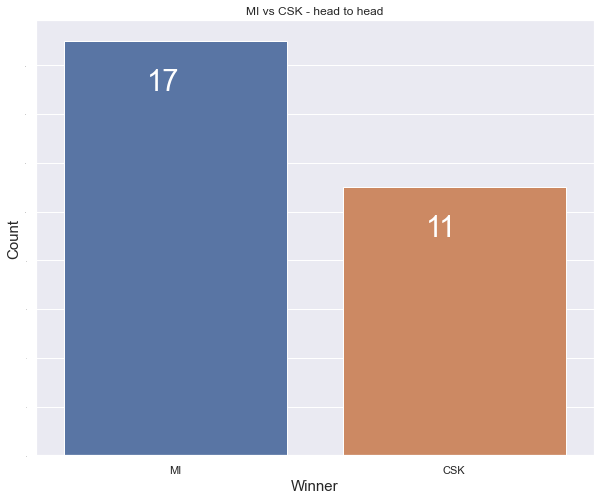

In [60]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(mi_csk['winner'],order=mi_csk['winner'].value_counts().index)

plt.text(-0.1,15,str(mi_csk['winner'].value_counts()['MI']),size=29,color='white')
plt.text(0.9,9,str(mi_csk['winner'].value_counts()['CSK']),size=29,color='white')

plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)

plt.title('MI vs CSK - head to head')
plt.show()

<center><font size=5><b>Toss decision statistics for all MIvCSK matches - Venue wise</b></font></center>

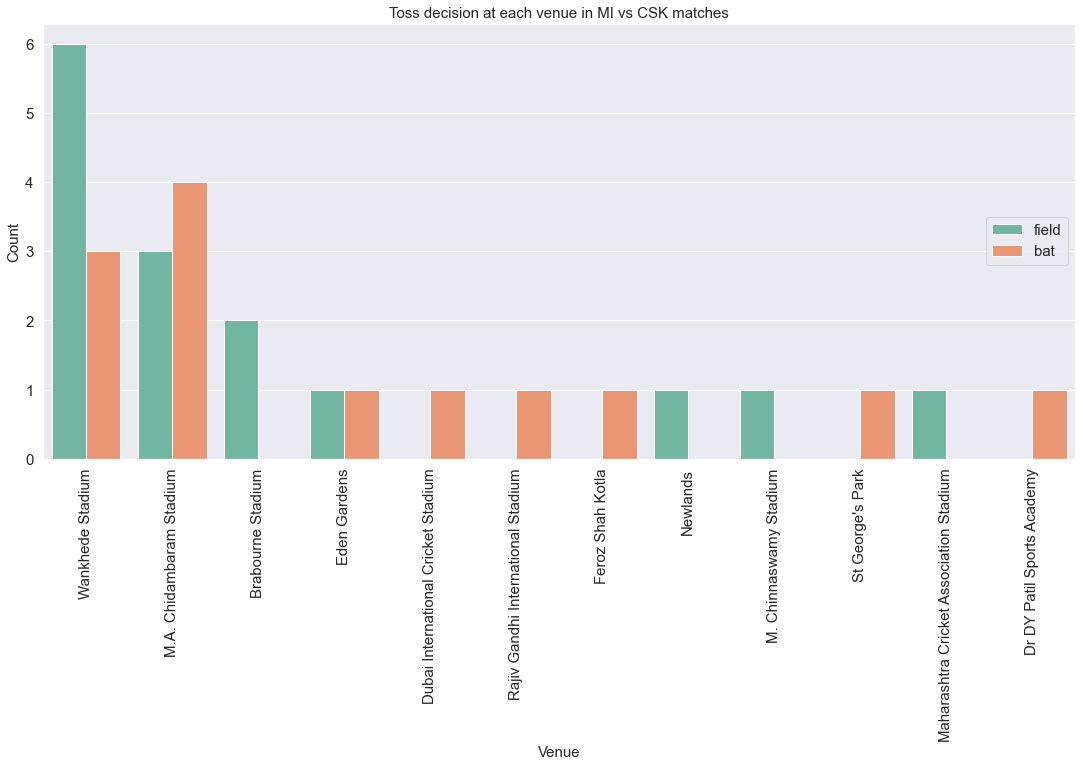

In [40]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(mi_csk['venue'],order=mi_csk['venue'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision at each venue in MI vs CSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

<center><font size=5><b>Decision upon winning the toss by both teams</b></font></center>


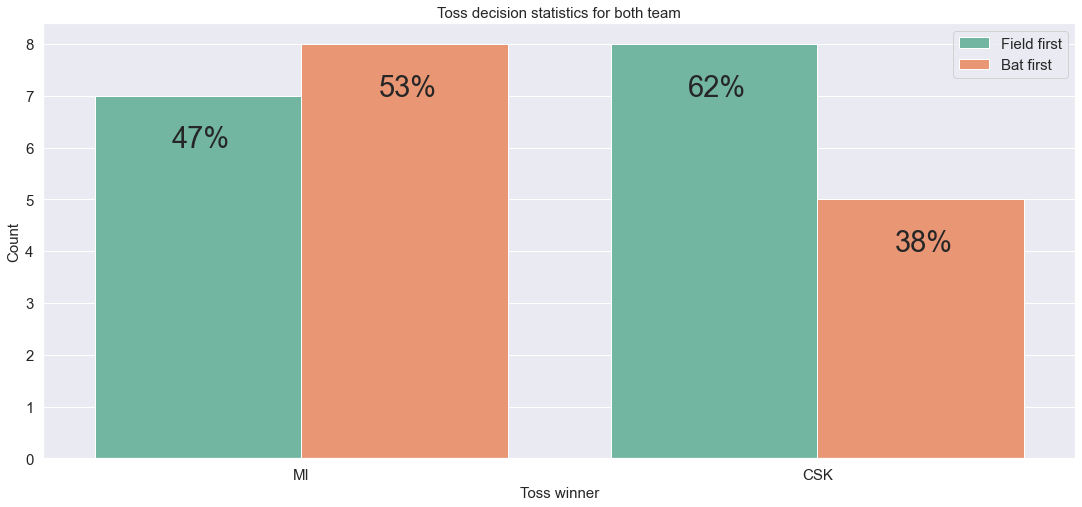

In [41]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(mi_csk['toss_winner'],order=mi_csk['toss_winner'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()


* MI tends to bat first (53% of the times)
* CSK tends to bowl first (62% of the times)

<center><font size=5><b>MI vs CSK - Best performers</b></font></center>

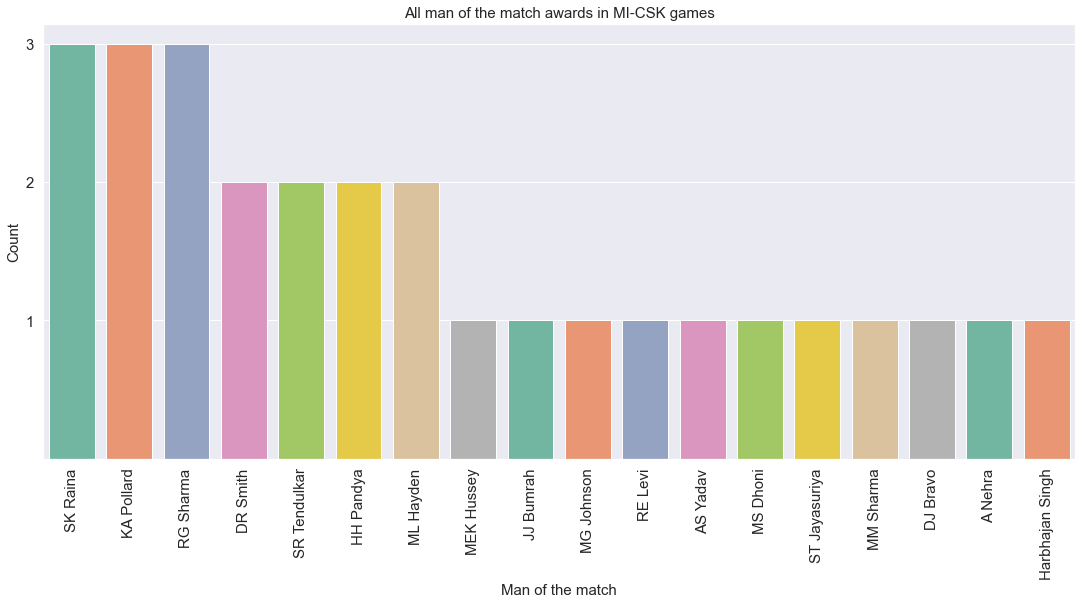

In [42]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(mi_csk['player_of_match'],order=mi_csk['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in MI-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<center><font size=4><b>Raina is the Star Player</b></font></center>

![image.png](images/raina.png)